In [2]:
from keras.datasets.mnist import load_data
#((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()
# x 是圖片  y 是答案

11493376/11490434 [==============================] - 93s 8us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


1


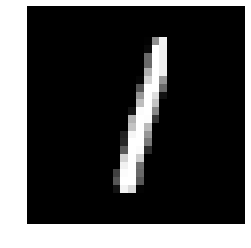

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print(y_train[c])
plt.axis("off") # 不顯示x ,y 軸標註
plt.imshow(x_train[c], cmap="gray") # 灰階呈現

In [25]:
# 隨機抓一個來看
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# 資料處理
# 1. 圖片部分 
# 把你圖轉成 0 - 1
# MLP的輸入必須是一維, 必須把她拉平
x_train_shape = x_train.reshape(60000, 784) / 255 
x_test_shape = x_test.reshape(10000, 784) / 255

In [7]:
# 2. 答案部分 轉換成one-hot Encoding
# 變成十個機率: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("處理前:", y_train[0])
print("處理後:", y_train_cat[0])

處理前: 5
處理後: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
mlp.add(Dense(256, input_dim=784, activation="relu")) # 256:第2層  784:第一層(總變數欄數) 
mlp.add(Dense(10, activation="softmax")) # 第三層 需要output 資料數
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 2. 確定你梯度下降所用的參數
# loss 一個神經元: binary_crossentropy 兩個以上神經元: categorical_crossentropy
# (補充) 回歸 神經元 acitvation不帶入, loss="mse"
mlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# 3. 訓練!!!!
# batch_size: 看幾筆調整一次W
# epochs: 整個資料集總共看幾次
# batch = 200, epochs = 10: 60000 * 10 / 200 = 3000次梯度調整
# fit到什麼時候為止呢? val_loss開始平緩就停下來
mlp.fit(x_train_shape, y_train_cat, batch_size=200, epochs=15, validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 2s - loss: 0.3657 - acc: 0.8998 - val_loss: 0.1566 - val_acc: 0.9605
Epoch 2/15
 - 1s - loss: 0.1639 - acc: 0.9535 - val_loss: 0.1193 - val_acc: 0.9693
Epoch 3/15
 - 1s - loss: 0.1163 - acc: 0.9671 - val_loss: 0.1003 - val_acc: 0.9737
Epoch 4/15
 - 1s - loss: 0.0888 - acc: 0.9745 - val_loss: 0.0893 - val_acc: 0.9737
Epoch 5/15
 - 1s - loss: 0.0695 - acc: 0.9806 - val_loss: 0.0823 - val_acc: 0.9773
Epoch 6/15
 - 1s - loss: 0.0566 - acc: 0.9840 - val_loss: 0.0783 - val_acc: 0.9787
Epoch 7/15
 - 1s - loss: 0.0467 - acc: 0.9867 - val_loss: 0.0750 - val_acc: 0.9788
Epoch 8/15
 - 1s - loss: 0.0384 - acc: 0.9896 - val_loss: 0.0763 - val_acc: 0.9788
Epoch 9/15
 - 1s - loss: 0.0318 - acc: 0.9921 - val_loss: 0.0715 - val_acc: 0.9803
Epoch 10/15
 - 1s - loss: 0.0264 - acc: 0.9934 - val_loss: 0.0712 - val_acc: 0.9807
Epoch 11/15
 - 1s - loss: 0.0217 - acc: 0.9951 - val_loss: 0.0703 - val_acc: 0.9795
Epoch 12/15
 - 1s - loss: 0.0181 - a

In [30]:
print(mlp.predict_classes(x_test_shape)[:10]) # 預測前10筆
print(list(y_test)[:10])

[7 2 1 0 4 1 4 9 5 9]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [12]:
# 不用再自己accuracy_score, 你可以使用evaluate
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 15us/step


[0.07006549143292941, 0.9797]

In [34]:
from sklearn.metrics import confusion_matrix
pre = mlp.predict_classes(x_test_shape)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,971,1,1,1,1,0,1,0,2,2
1,0,1124,3,2,0,1,2,1,2,0
2,2,0,1014,2,2,0,2,4,6,0
3,0,0,3,995,2,0,0,2,3,5
4,0,0,3,0,964,0,5,2,0,8
5,2,0,0,20,1,858,4,1,3,3
6,4,3,1,2,4,3,940,0,1,0
7,0,4,8,3,0,0,0,1006,1,6
8,1,1,3,8,3,7,1,3,942,5
9,2,2,0,10,5,2,0,4,1,983


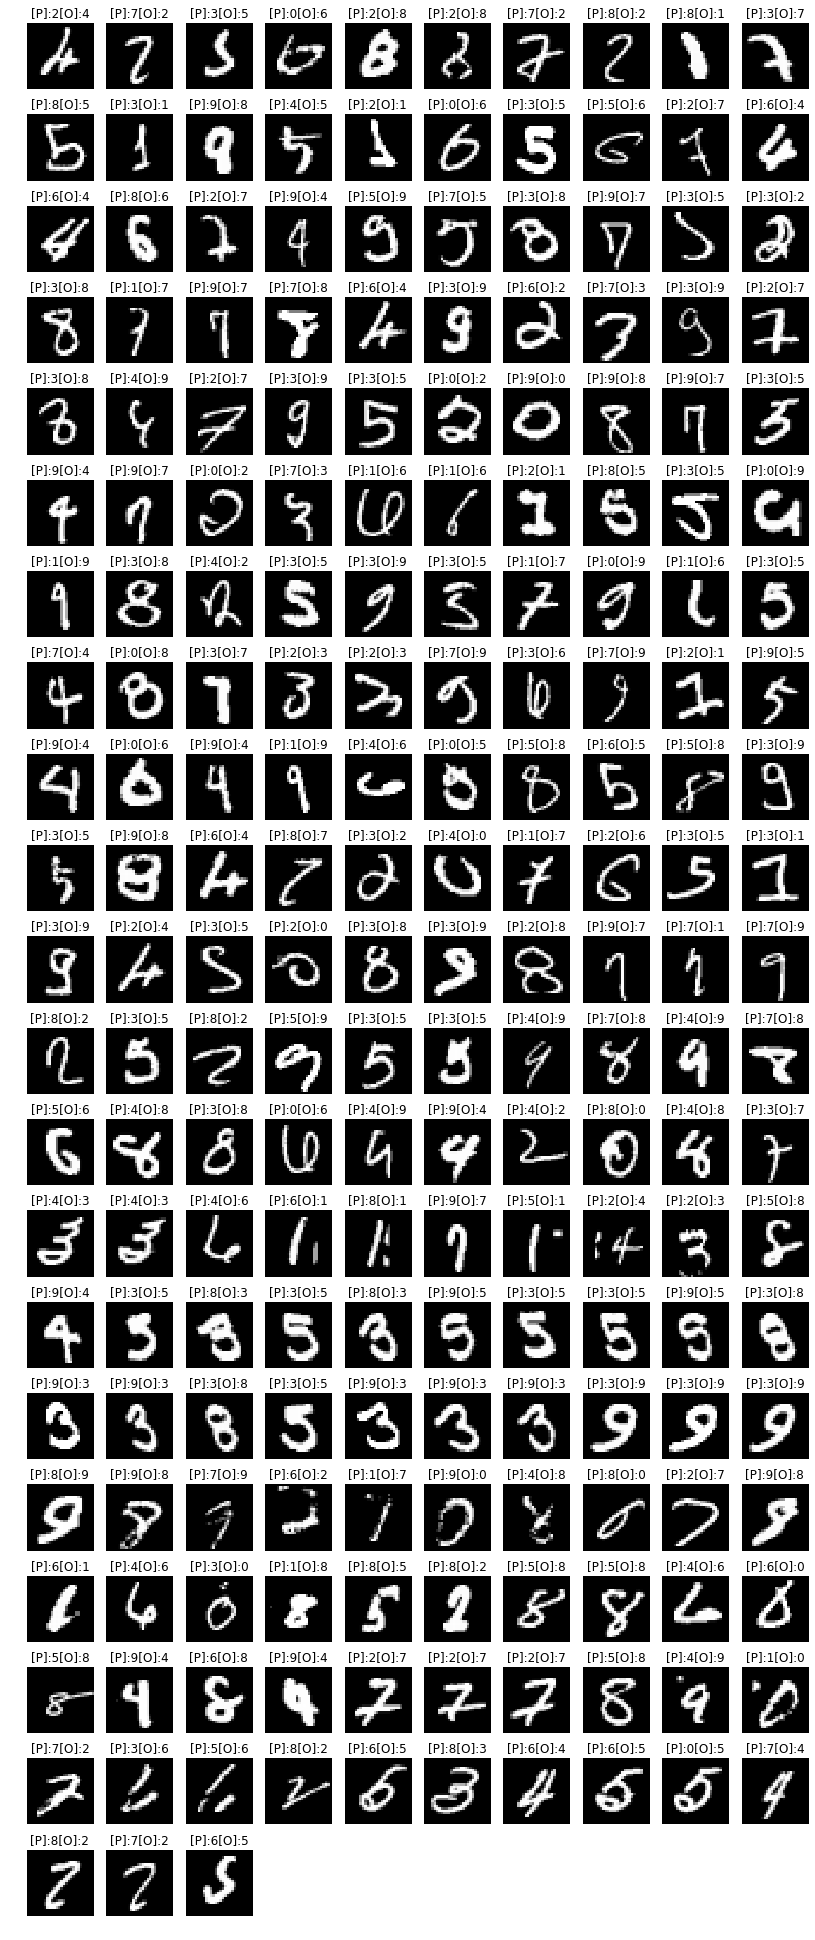

In [14]:
import numpy as np
idxs = np.nonzero(pre != y_test)[0] # 找出判斷錯誤的
# ["a", "b", "c"]
# for in : a -> b -> c
# for in enumerate : (0, a) -> (1, b) -> (2, c)
plt.figure(figsize=(14, 35)) # 每張圖 寬, 高
width = 10 # 一排 10張圖
height = int(len(idxs) / width) + 1 #高幾張圖
falsepre = pre[idxs]
falseori = y_test[idxs]
for (i, img) in enumerate(x_test[idxs]):
    plt.subplot(height, width, i + 1)
    t = "[P]:" + str(falsepre[i]) + "[O]:" + str(falseori[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [15]:
print("預測錯誤標籤:", pre[idxs])
print("正確標籤:", y_test[idxs])

預測錯誤標籤: [2 7 3 0 2 2 7 8 8 3 8 3 9 4 2 0 3 5 2 6 6 8 2 9 5 7 3 9 3 3 3 1 9 7 6 3 6
 7 3 2 3 4 2 3 3 0 9 9 9 3 9 9 0 7 1 1 2 8 3 0 1 3 4 3 3 3 1 0 1 3 7 0 3 2
 2 7 3 7 2 9 9 0 9 1 4 0 5 6 5 3 3 9 6 8 3 4 1 2 3 3 3 2 3 2 3 3 2 9 7 7 8
 3 8 5 3 3 4 7 4 7 5 4 3 0 4 9 4 8 4 3 4 4 4 6 8 9 5 2 2 5 9 3 8 3 8 9 3 3
 9 3 9 9 3 3 9 9 9 3 3 3 8 9 7 6 1 9 4 8 2 9 6 4 3 1 8 8 5 5 4 6 5 9 6 9 2
 2 2 5 4 1 7 3 5 8 6 8 6 6 0 7 8 7 6]
正確標籤: [4 2 5 6 8 8 2 2 1 7 5 1 8 5 1 6 5 6 7 4 4 6 7 4 9 5 8 7 5 2 8 7 7 8 4 9 2
 3 9 7 8 9 7 9 5 2 0 8 7 5 4 7 2 3 6 6 1 5 5 9 9 8 2 5 9 5 7 9 6 5 4 8 7 3
 3 9 6 9 1 5 4 6 4 9 6 5 8 5 8 9 5 8 4 7 2 0 7 6 5 1 9 4 5 0 8 9 8 7 1 9 2
 5 2 9 5 5 9 8 9 8 6 8 8 6 9 4 2 0 8 7 3 3 6 1 1 7 1 4 3 8 4 5 3 5 3 5 5 5
 5 8 3 3 8 5 3 3 3 9 9 9 9 8 9 2 7 0 8 0 7 8 1 6 0 8 5 2 8 8 6 0 8 4 8 4 7
 7 7 8 9 0 2 6 6 2 5 3 4 5 5 4 2 2 5]


請輸入檔名:test1.png
預測結果: [2]


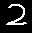

In [42]:
# 兩大圖像處理函式庫(PIL, opencv)
# PIL幫我安裝Pillow
# !!! 再用的時候所有東西都轉成np array
from PIL import Image
fn = input("請輸入檔名:")
oriimg = Image.open(fn).convert("L") # convert"L"開成灰階檔
img = oriimg.resize((28, 28)) # 變更成28*28像素
img_shape = np.array(img).reshape(784) / 255 # 只有一筆 不填筆數 只填總變數量 及轉化 0~1的值
print("預測結果:", mlp.predict_classes(np.array([img_shape]))) # 印出預測
oriimg